# NOTE:
Problem 3:
Working with the attached demodata20201118.csv file and the given information below, show me what makes you unique when you approach data analysis and presentation. Be creative.
1.	Test1 is the test students took the first day they began using the software to set their benchmark level
 column G
2.      Comp Score is the overall grade level equivalent of the score the student earned on the progress test
 column H
2.	Hours used is how many hours the student has used the software
 column J

# Note: The dates, scores, and hours used are real data, but all the names of students, schools, and classes are fake. None of this is FERPA-protected data.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns; sns.set()

In [2]:
files= os.listdir('.')
files

['.ipynb_checkpoints',
 '3_analysis_second_sec.pdf',
 '3_first.pdf',
 '3_student_analysis.ipynb',
 '3_student_data_analysis.pptx',
 '3_student_data_analysis_copy.pptx',
 'box_plot_performance_based_by_GENDER.png',
 'comparison_COMP_SCORE.ipynb',
 'demodata20201118.csv',
 'visualizations.txt',
 '~$3_student_data_analysis_copy.pptx']

In [3]:
df_school= pd.read_csv('demodata20201118.csv')

# To understand the distribution of data

In [4]:
df_school.describe()

,Username,Grade Level,Test1_CompScore,mostRecentCompScore,HoursUsed
count,1000.000000,1000.000000,764.000000,803.000000,803.000000
mean,177261.269000,9.756000,5.543194,5.976339,10.243989
std,77093.772978,0.977456,3.078606,2.908529,7.833847
min,100005.000000,9.000000,0.000000,0.000000,0.352500
25%,100844.750000,9.000000,4.000000,4.000000,4.124028
50%,200661.000000,9.000000,6.000000,6.000000,8.620556
75%,204134.250000,10.000000,8.000000,8.000000,14.396528
max,316485.000000,12.000000,11.000000,12.000000,63.882222


# Possible Analysis:

- What are the FEATURES on the data set
- What FEATURES can give insight of the students data
- Types of data
- Students who has Start of Software Date and Progress on Comp Score
- Students with NO start of Software Date and WHO have used Software 
- Software Starting Date by MONTH
- Performance between Different Grade Levels
- Performance based on Different Schools


# Note: The dates, scores, and hours used are real data, but all the names of students, schools, and classes are fake. None of this is FERPA-protected data.

# By the given FACTS:
- I have focused my analysis on the STUDENTS Comp SCORE, Software Usage, and Software Testing Date Since these data represents the REAL DATA

In [5]:
df_school.head(4)

,Username,First Name,Last Name,School Name,Grade Level,Class Name,Test1_Date,Test1_CompScore,mostRecentCompScore,HoursUsed
0,100204,Gina,Hooper,Schmitt High School,9,Rivera - Period 7,8/5/2020,6.0,6.0,11.445556
1,100205,Dane,Bates,Schmitt High School,9,Davila - Period 7,8/5/2020,6.0,6.0,10.396944
2,100206,Autumn,Flowers,Cherry Early College High School,9,Acosta - Period 1,8/5/2020,3.0,6.0,13.669722
3,100207,Terrell,Arnold,Freeman Career Technical School,9,Wu - Period 7,8/5/2020,9.0,9.0,11.121389


# Checking for any MISSING VALUES
- Here, Missing values that can be detected: NA

# MISSING VALUES in INDIVIDUAL FEATURE (SUM)

In [6]:
for i in range(0,len (df_school.columns)):
    print(df_school.columns[i],":",df_school[df_school.columns[i]].isnull().sum())

Username : 0
First Name : 0
Last Name : 0
School Name : 0
Grade Level : 0
Class Name : 0
Test1_Date : 236
Test1_CompScore : 236
mostRecentCompScore : 197
HoursUsed : 197


# POSSIBLE REPLACEMENT OF NULL VALUES:
- Assigning ZERO value with SCORE 
- Assigning missing DATE with most COMMON Start DATE 
- Droping the rows that has missing values

# CHECKING the data types 

In [7]:
df_school.dtypes

Username                 int64
First Name              object
Last Name               object
School Name             object
Grade Level              int64
Class Name              object
Test1_Date              object
Test1_CompScore        float64
mostRecentCompScore    float64
HoursUsed              float64
dtype: object

# Number of Schools

In [8]:
df_school['School Name'].unique()

array(['Schmitt High School', 'Cherry Early College High School',
       'Freeman Career Technical School', 'Brooks High School',
       'Jacobs High School', 'Douglas High School',
       'Foley Arts Focus High School', 'Lawson High School'], dtype=object)

# Data TYPES and Information 

In [9]:
df_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Username             1000 non-null   int64  
 1   First Name           1000 non-null   object 
 2   Last Name            1000 non-null   object 
 3   School Name          1000 non-null   object 
 4   Grade Level          1000 non-null   int64  
 5   Class Name           1000 non-null   object 
 6   Test1_Date           764 non-null    object 
 7   Test1_CompScore      764 non-null    float64
 8   mostRecentCompScore  803 non-null    float64
 9   HoursUsed            803 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 78.2+ KB


-------------------------------------------------

# Number of Students starting Date for SOFTWARE USAGE
- Number of students

# GRADE level

In [10]:
df_school['Grade Level'].unique()


array([ 9, 10, 11, 12], dtype=int64)

# TOTAL students on each GRADE

In [11]:
df_school['Grade Level'][df_school['Grade Level'].values ==9 ].count()

539

In [12]:
for j in range(9, 13):
    print('Grade ', j, ':',df_school['Grade Level'][df_school['Grade Level'].values ==j ].count())

Grade  9 : 539
Grade  10 : 256
Grade  11 : 115
Grade  12 : 90


# Students whose Software Test 1 has been Recorded by MONTH


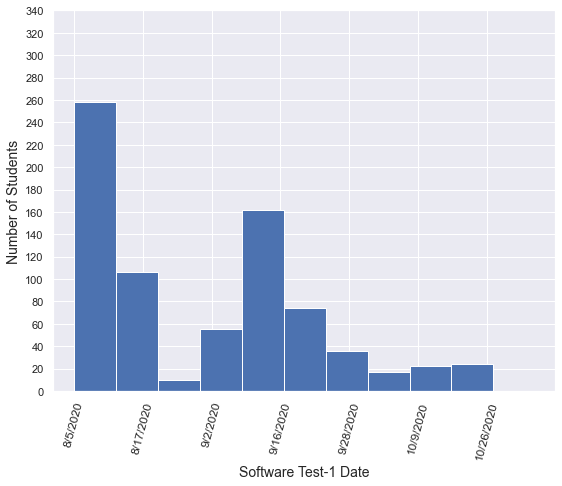

In [13]:
%matplotlib inline
plt.hist(df_school[['Test1_Date']][df_school['Test1_Date'].notnull()], bins=10)

plt.xlabel('Software Test-1 Date', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.gcf().set_size_inches(9,7)
plt.yticks(np.arange(0,350, 20))
plt.xticks(np.arange(0,80,10), rotation='75', fontsize= 12);

# Software TEST 1 Start Date by GRADE Level of STUDENTS

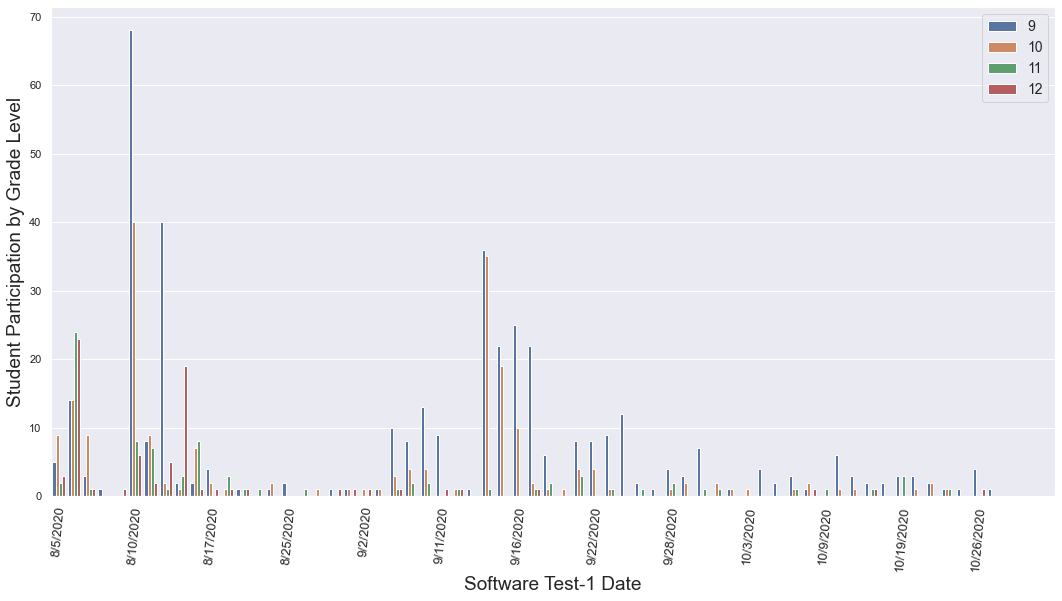

In [14]:
from matplotlib.pyplot import figure, show

df_grade_lv= df_school[df_school['Test1_Date'].notnull()]
df_grade_lv_new= df_grade_lv.drop(columns=['Username'])

sns.countplot(x= 'Test1_Date', hue='Grade Level', data= df_grade_lv_new, dodge= True)
plt.gcf().set_size_inches(18,9)
plt.legend(loc=1, prop={'size': 14})
plt.xlabel('Software Test-1 Date', fontsize=19)
plt.ylabel('Student Participation by Grade Level', fontsize=19)
#plt.yticks(np.arange(0,75,15))
plt.xticks(np.arange(0,70, 5), rotation='85', fontsize= 13);

# RESULT:
- Graph shows the large numbers of students from GRADE 9 started early using the software than rest
- 

# TEST SCORES

# FIRST TEST-1 COMPSCORE

Text(0.5, 0, 'Test-1 Score')

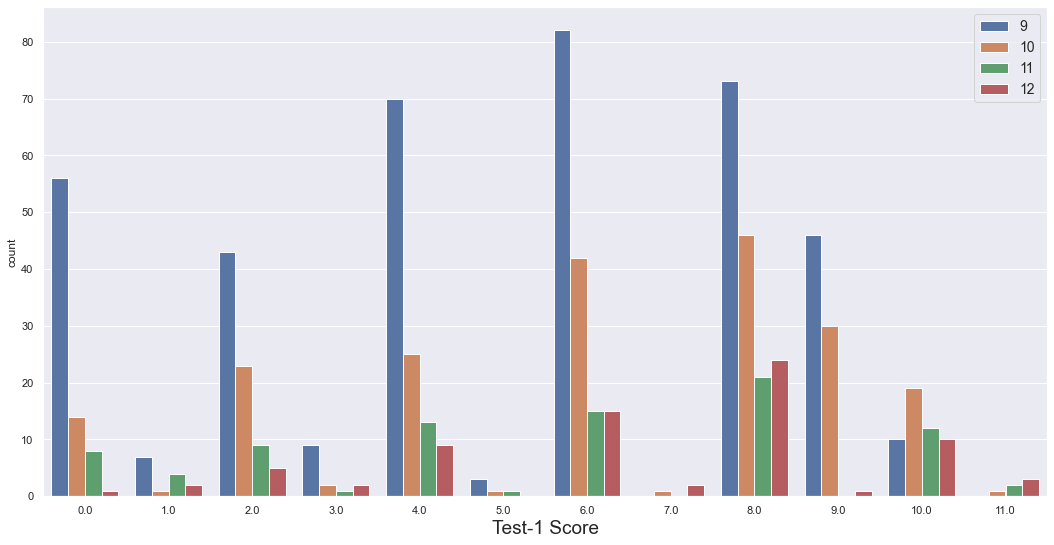

In [15]:
sns.countplot(x= 'Test1_CompScore', hue='Grade Level', data= df_grade_lv_new, dodge= True)
plt.gcf().set_size_inches(18,9)
plt.legend(loc=1, prop={'size': 14})
plt.xlabel('Test-1 Score', fontsize=19)
#plt.ylabel('Student Participation by Grade Level', fontsize=19)
#plt.yticks(np.arange(0,75,15))
#plt.xticks(np.arange(0,70, 5), rotation='85', fontsize= 13);

# MOST RECENT CompSCORE

Text(0.5, 0, 'Most Recent Comp Score')

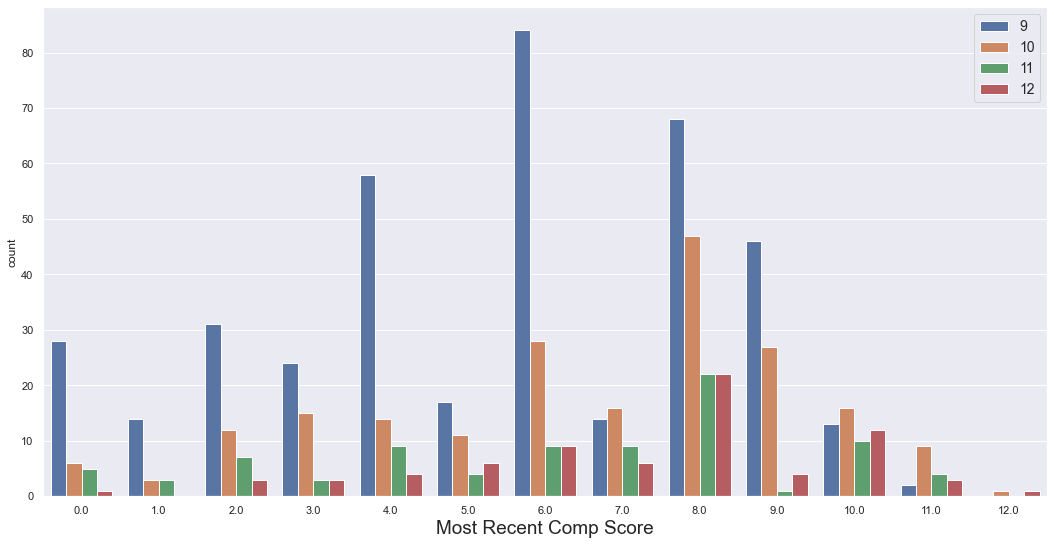

In [16]:
sns.countplot(x= 'mostRecentCompScore', hue='Grade Level', data= df_grade_lv_new, dodge= True)
plt.gcf().set_size_inches(18,9)
plt.legend(loc=1, prop={'size': 14})
plt.xlabel('Most Recent Comp Score', fontsize=19)

# STUDENTS metrics based on GRADE LEVEL

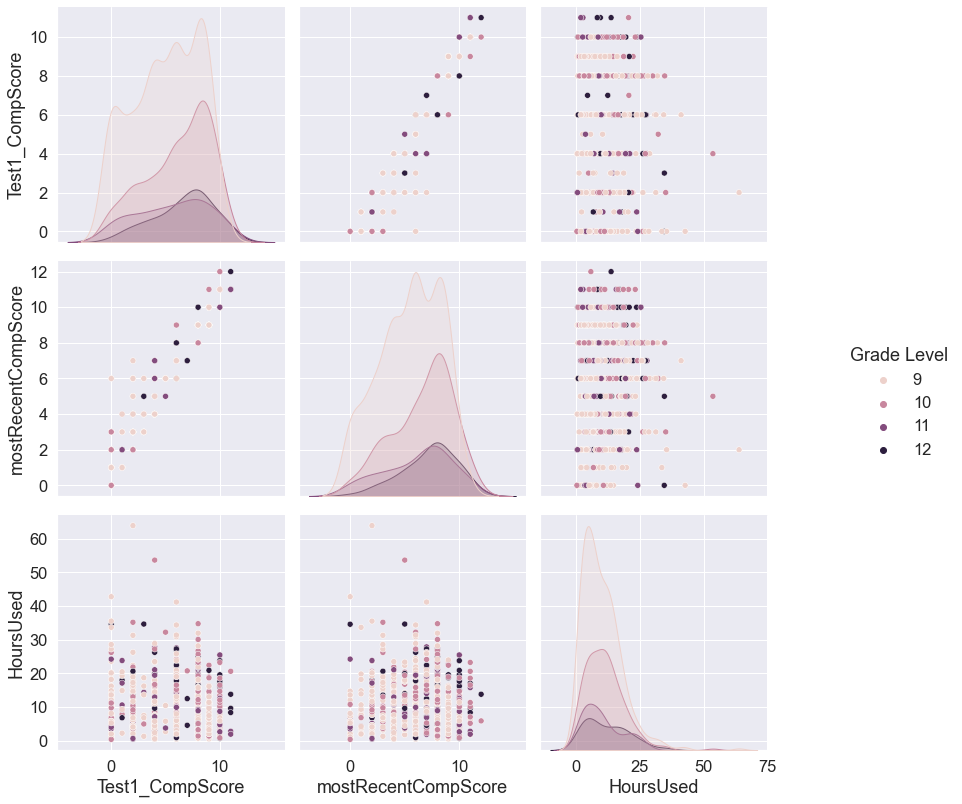

In [17]:
sns.set(font_scale= 1.5)
sns.pairplot(df_grade_lv_new, hue="Grade Level")
plt.gcf().set_size_inches(14,12)


# RESULT:
- Grade 9 Students have performed better than rest

# CHECKING Correlationship with STUDENT score level

- Corr: PEARSON

In [18]:
# drop the username
student_score_relation= df_school.drop(columns=['Username'])
student_score_relation.corr(method='pearson')['Test1_CompScore']

Grade Level            0.161792
Test1_CompScore        1.000000
mostRecentCompScore    0.965495
HoursUsed             -0.049124
Name: Test1_CompScore, dtype: float64

# TOTAL hours of SOFTWARE  usage and Test SCORE

# NOTE: For Students ONLY who have BOTH the STARTING date for SOFTWARE TEST and also who has TEST SCORE

In [19]:
students_test_rec= df_school[(df_school['Test1_Date'].notnull()) &(df_school['Test1_CompScore'].notnull())]
students_test_rec.describe()

,Username,Grade Level,Test1_CompScore,mostRecentCompScore,HoursUsed
count,764.000000,764.000000,764.000000,764.000000,764.000000
mean,161154.040576,9.784031,5.543194,6.010471,10.623084
std,72030.541633,0.988376,3.078606,2.871635,7.819275
min,100005.000000,9.000000,0.000000,0.000000,0.352500
25%,100739.750000,9.000000,4.000000,4.000000,4.513819
50%,101369.500000,9.000000,6.000000,6.000000,9.332639
75%,202539.750000,10.000000,8.000000,8.000000,14.640417
max,316485.000000,12.000000,11.000000,12.000000,63.882222


# RESULT:
* Total Students who have Software have starting Test Date and Comp Score= 764
* Average Hours spent using the Software= 10.623084

# FINDINGS:
- Same number of students who have both Starting Date for software Usage and Test1_CompScore but have '0' Score

In [20]:
students_test_rec[['Test1_CompScore','mostRecentCompScore','HoursUsed']][students_test_rec['Test1_CompScore'].values == 0]

,Test1_CompScore,mostRecentCompScore,HoursUsed
22,0.0,6.0,13.834444
26,0.0,2.0,12.699444
41,0.0,3.0,26.180833
94,0.0,2.0,9.743611
97,0.0,0.0,1.213056
...,...,...,...
688,0.0,0.0,5.233611
700,0.0,0.0,13.556389
701,0.0,2.0,11.137778
729,0.0,0.0,0.352500


# Scatter plot on Hours Software used and Comp Score

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


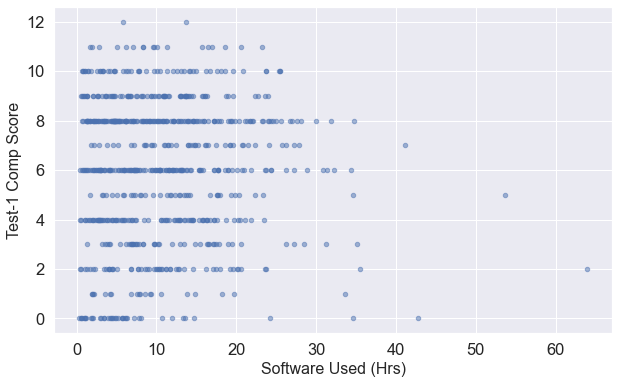

In [21]:
#plt.scatter(students_test_rec['HoursUsed'], students_test_rec['mostRecentCompScore'])
students_test_rec.plot(x="HoursUsed", y="mostRecentCompScore", kind="scatter", alpha= 0.5)
plt.gcf().set_size_inches(10,6)
plt.xlabel('Software Used (Hrs)', fontsize= 16)
plt.ylabel('Test-1 Comp Score', fontsize=16);


# USING violin plot

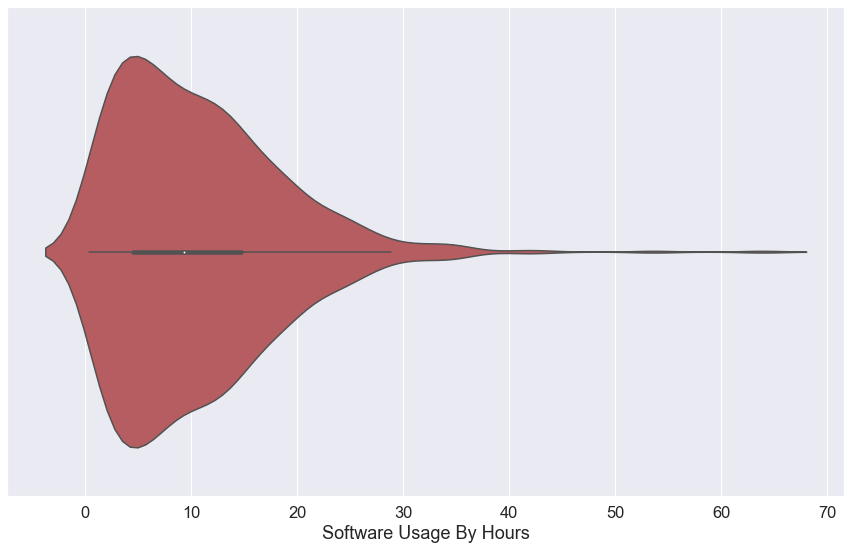

In [22]:
sns.violinplot(x='HoursUsed', data= students_test_rec, color='r')
plt.xlabel('Software Usage By Hours', fontsize=18)
plt.gcf().set_size_inches(15,9)

-------------------------------------

# STUDYING THE DATA: THINGS to CONSIDER 

# Students with NO Starting Software Date (Test Date) and also have NO ComP SCORE
- Comp Score is the overall grade level equivalent of the score the student earned on the progress test

In [23]:
df_school[['Username','First Name','Last Name', 'Test1_Date','Test1_CompScore', 'HoursUsed']][(df_school['Test1_Date'].isnull()) & (df_school['Test1_CompScore'].isnull())]

,Username,First Name,Last Name,Test1_Date,Test1_CompScore,HoursUsed
764,100145,Kimora,Estrada,NaN,NaN,1.700278
765,100146,Athena,Carrillo,NaN,NaN,2.548889
766,100325,Pablo,Carson,NaN,NaN,NaN
767,100784,Lilah,Andersen,NaN,NaN,NaN
768,101141,Matias,Hunter,NaN,NaN,2.721389
...,...,...,...,...,...,...
995,312196,Giovanni,Burch,NaN,NaN,NaN
996,312506,Emma,Herman,NaN,NaN,NaN
997,312507,Guadalupe,Mcconnell,NaN,NaN,NaN
998,312508,Joe,Knox,NaN,NaN,NaN


# RESULT
- TOTAL STUDENTS who have NO Starting Date for Software Tests= 236
- NOTE:Same NUMBER of students also do not have Test1_COMPSCORE VALUE

-----------------------------------------

# FINDINGS:
# However, the SAME STUDENTS have used the software for several of Hours

In [40]:
finding_one= df_school[['Username','First Name','Last Name','Grade Level', 'Test1_Date','Test1_CompScore','mostRecentCompScore', 'HoursUsed']][(df_school['Test1_Date'].isnull()) & (df_school['Test1_CompScore'].isnull())]
students_used_software=finding_one[['Username', 'First Name', 'Last Name', 'Grade Level','Test1_Date','Test1_CompScore','mostRecentCompScore','HoursUsed']][finding_one['HoursUsed'].notnull()]
students_used_software.describe()

,Username,Grade Level,Test1_CompScore,mostRecentCompScore,HoursUsed
count,39.000000,39.000000,0.0,39.000000,39.000000
mean,221821.871795,9.794872,NaN,5.307692,2.817607
std,81981.974569,0.922796,NaN,3.532956,2.841187
min,100145.000000,9.000000,NaN,0.000000,0.382500
25%,200093.000000,9.000000,NaN,2.000000,1.390139
50%,202474.000000,9.000000,NaN,6.000000,1.886111
75%,303472.000000,11.000000,NaN,8.000000,2.858472
max,316158.000000,12.000000,NaN,11.000000,14.005000


In [63]:
students_used_software.isnull().sum()

Username                0
First Name              0
Last Name               0
Grade Level             0
Test1_Date             39
Test1_CompScore        39
mostRecentCompScore     0
HoursUsed               0
dtype: int64

# GRADE 9

In [43]:
students_used_software[students_used_software['Grade Level'].values == 9]

,Username,First Name,Last Name,Grade Level,Test1_Date,Test1_CompScore,mostRecentCompScore,HoursUsed
764,100145,Kimora,Estrada,9,NaN,NaN,6.0,1.700278
765,100146,Athena,Carrillo,9,NaN,NaN,6.0,2.548889
768,101141,Matias,Hunter,9,NaN,NaN,6.0,2.721389
771,101272,Francesca,Erickson,9,NaN,NaN,2.0,4.655556
773,101385,Desiree,Chavez,9,NaN,NaN,9.0,2.017222
795,200090,Wyatt,Henderson,9,NaN,NaN,8.0,2.834167
798,200096,Kassidy,Adams,9,NaN,NaN,8.0,1.828333
801,200196,Antony,Silva,9,NaN,NaN,4.0,2.096389
816,200698,Lexi,Mendez,9,NaN,NaN,9.0,2.707222
818,200726,August,Edwards,9,NaN,NaN,0.0,2.882778


# GRADE 10

In [44]:
students_used_software[students_used_software['Grade Level'].values == 10]

,Username,First Name,Last Name,Grade Level,Test1_Date,Test1_CompScore,mostRecentCompScore,HoursUsed
776,100307,Eve,Petersen,10,NaN,NaN,6.0,3.396389
784,101386,Olive,Melendez,10,NaN,NaN,8.0,1.217500
898,201586,Cullen,Miles,10,NaN,NaN,8.0,9.881667
901,202474,Braydon,Donovan,10,NaN,NaN,2.0,1.501111
941,300910,Carlie,Mills,10,NaN,NaN,0.0,1.018611
966,314311,Miah,Perkins,10,NaN,NaN,8.0,1.620556
967,315676,Lillian,Levy,10,NaN,NaN,9.0,1.886111
969,316158,Rhett,Parrish,10,NaN,NaN,8.0,5.698056


# GRADE 11

In [45]:
students_used_software[students_used_software['Grade Level'].values == 11]

,Username,First Name,Last Name,Grade Level,Test1_Date,Test1_CompScore,mostRecentCompScore,HoursUsed
786,100473,Alexia,Bowers,11,NaN,NaN,6.0,3.081944
787,100525,Alyssa,Stokes,11,NaN,NaN,0.0,0.404167
971,300021,Shayla,Acevedo,11,NaN,NaN,11.0,0.697222
973,300502,Deacon,Leblanc,11,NaN,NaN,0.0,8.440556
976,302714,Ada,Bradshaw,11,NaN,NaN,4.0,0.968889
977,303309,Hallie,Leblanc,11,NaN,NaN,10.0,8.371389
978,304232,Uriel,Castaneda,11,NaN,NaN,10.0,0.500833
984,310344,Adrienne,Vaughn,11,NaN,NaN,0.0,14.005000
985,310526,Curtis,Chung,11,NaN,NaN,4.0,2.263056
989,314450,Holden,Douglas,11,NaN,NaN,2.0,1.396944


# GRADE 12

In [46]:
students_used_software[students_used_software['Grade Level'].values == 12]

,Username,First Name,Last Name,Grade Level,Test1_Date,Test1_CompScore,mostRecentCompScore,HoursUsed
909,202111,Atticus,Dougherty,12,NaN,NaN,0.0,0.443333


# SNS PLOT to show

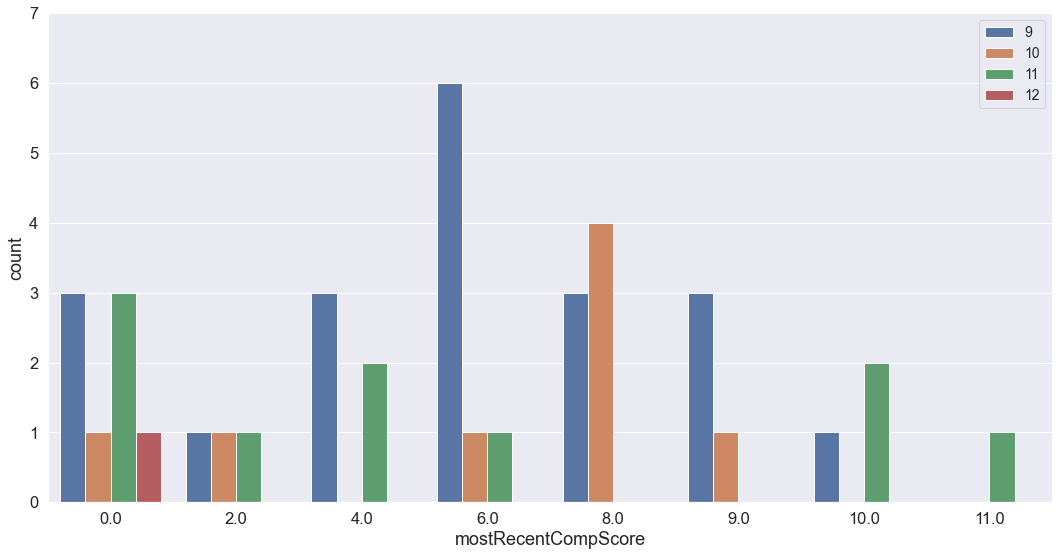

In [58]:
sns.countplot(x= 'mostRecentCompScore',  hue='Grade Level', data= students_used_software)
plt.gcf().set_size_inches(18,9)
plt.legend(loc=1, prop={'size': 14})
#plt.xlabel('Most Recent Comp Score', fontsize=19)
plt.yticks(np.arange(0,8));

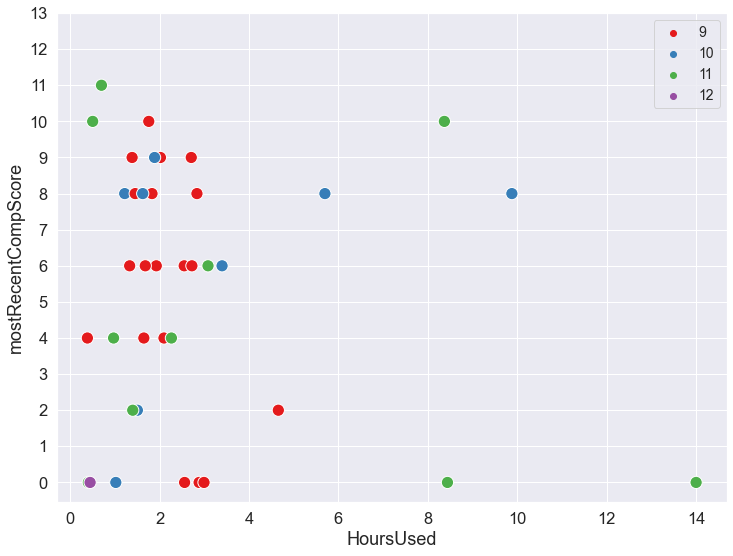

In [99]:
sns.scatterplot(x= 'HoursUsed', y='mostRecentCompScore', hue='Grade Level', data= students_used_software, palette="Set1",s= 150)
sns.set(font_scale= 1.5)
plt.gcf().set_size_inches(12,9)
plt.legend(loc=1, prop={'size': 14})
#plt.xlabel('Most Recent Comp Score', fontsize=19)
plt.yticks(np.arange(0,14));

# RESULT:
- Total Students who have NO STARTING date for SOFTWARE TESTING and No CompScore= 39
- However, same students have the records on MOST RECENT COMP SCORE and Also they have used
    the SOFTWARE for couple of hours
- Average hours software used by same student= 2.81

In [102]:
# Hous that the SOFTWARE has been used
students_used_software[['mostRecentCompScore','HoursUsed']].describe()

,mostRecentCompScore,HoursUsed
count,39.000000,39.000000
mean,5.307692,2.817607
std,3.532956,2.841187
min,0.000000,0.382500
25%,2.000000,1.390139
50%,6.000000,1.886111
75%,8.000000,2.858472
max,11.000000,14.005000


# SCATTER PLOT 
- Students who don't have software Testing Date But have used Software
- EACH students are represented by ID

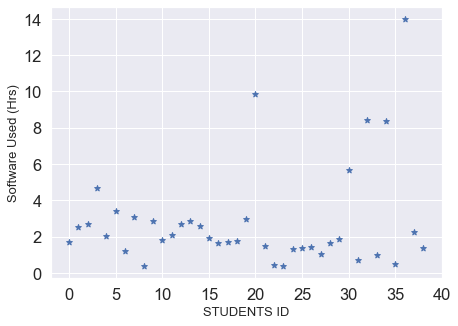

In [38]:
plt.scatter(np.arange(0,len(students_used_software['Username'])), students_used_software['HoursUsed'], marker='*')

# MOST RECENT SCORES whose TEST1-DAte is not recorded NOR Test-1 SCORE
plt.
plt.gcf().set_size_inches(7,5)
plt.xlabel('STUDENTS ID', fontsize= 13)
plt.ylabel('Software Used (Hrs)', fontsize= 13)
plt.yticks(np.arange(0,16,2))
plt.xticks(np.arange(0,45,5));


-------------------------------